### Data Set Description:


In [3]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the data frame
df=pd.read_csv("Car-price prediction\\train-data.csv")

In [5]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.shape

(6019, 14)

In [8]:
#Checking the null values in the data
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
df=df.drop(["New_Price"],axis=1)

In [10]:
# So,there are null values in "Mileage","Engine","Power,Seats","New_price".
#Therefore eliminiating null values in these columns.
null_features=["Mileage","Engine","Power","Seats"]
for i in null_features:
    df=df[df[i].notna()]
df = df.reset_index(drop=True)  

In [11]:
#Converting Mileage into one unit ('km/kg')
Mileage_converted= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Mileage_converted.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Mileage_converted.append(float(i))


In [12]:
df['Mileage']=Mileage_converted

In [13]:
#Considering only non-Null values in "Power" feature
df[pd.to_numeric(df.Power, errors = 'coerce').isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.00,1248 CC,74 bhp,5.0,4.75
5971,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.00,1120 CC,71 bhp,5.0,4.00
5972,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,8.0,2.90
5973,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.00,998 CC,67.1 bhp,5.0,2.65


In [14]:
#Splitting the strings and neglecting the units.The units are eliminated from here on.
df['Engine'] = df['Engine'].str.split().str[0]
df['Power'] = df['Power'].str.split().str[0]
df=df[df.Power != 'null']

In [15]:
#Converting Engine and Power float data types
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)

In [16]:
#Checking the current data types
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [17]:
df['Power'] = df['Power'].astype(float)

In [18]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
#Checking the unique values for each feature and storing the feature and its unique values in dictionary
Check_list=[]
feature_unique={'feature':[],'unique':[]}
for i in df:
        feature_unique['feature'].append(i)
        feature_unique['unique'].append(df[i].nunique())
for j in range(12):
    print("The {} feature has {} unique values".format(feature_unique['feature'][j],feature_unique['unique'][j]))

The Unnamed: 0 feature has 5872 unique values
The Name feature has 1811 unique values
The Location feature has 11 unique values
The Year feature has 22 unique values
The Kilometers_Driven feature has 3038 unique values
The Fuel_Type feature has 4 unique values
The Transmission feature has 2 unique values
The Owner_Type feature has 4 unique values
The Mileage feature has 161 unique values
The Engine feature has 139 unique values
The Power feature has 368 unique values
The Seats feature has 8 unique values


In [21]:
df= df.drop(['Unnamed: 0'],axis = 1)

### Data Visualization

C:\Users\HP\anaconda3\envs\workenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Location', ylabel='count'>

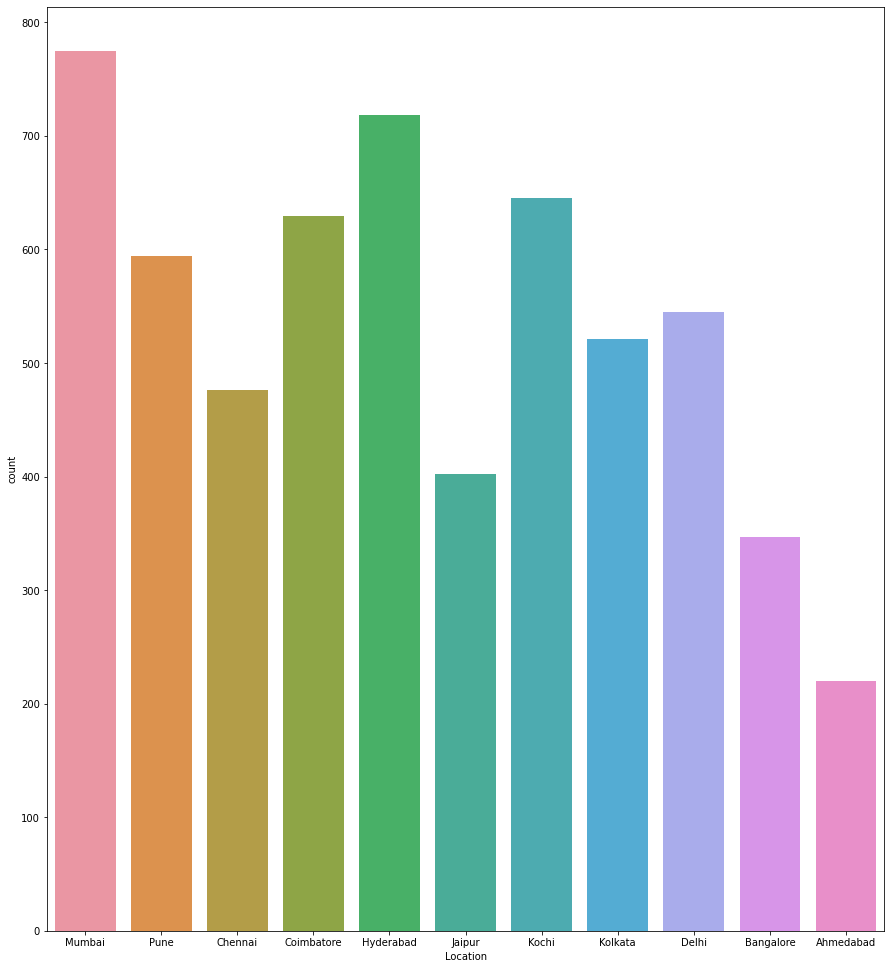

In [22]:
plt.figure(figsize=(15,17))
sns.countplot(df['Location'])

Text(0.5, 1.0, 'kilometers vs The owner_type')

<Figure size 2880x2880 with 0 Axes>

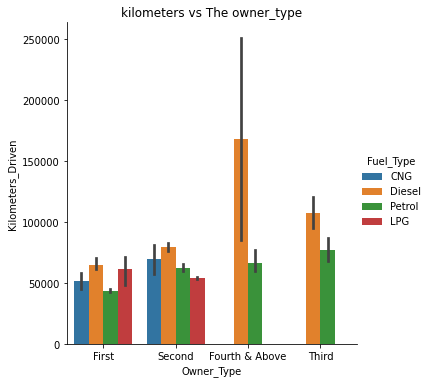

In [23]:
plt.figure(figsize=(40,40))
sns.catplot(x = 'Owner_Type', y = 'Kilometers_Driven',hue = 'Fuel_Type',kind = 'bar', data = df)
plt.title('kilometers vs The owner_type')


Text(0.5, 1.0, 'Counting transamission based on owner type')

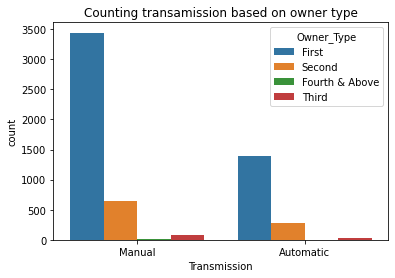

In [24]:
sns.countplot(x = 'Transmission', hue ='Owner_Type', data = df )
plt.title('Counting transamission based on owner type')

Text(0.5, 1.0, 'Price vs Fuel_type')

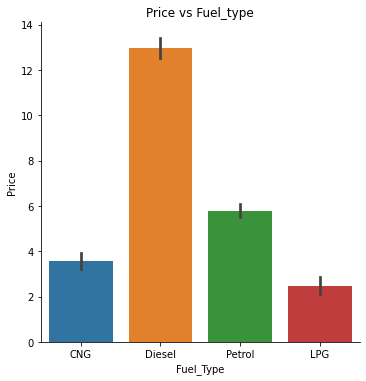

In [25]:
sns.catplot(x ='Fuel_Type' , y = 'Price',kind = 'bar',data = df)
plt.title("Price vs Fuel_type")

Text(0.5, 1.0, 'Price vs Fuel_type')

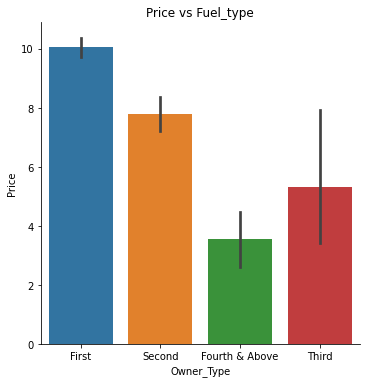

In [26]:
sns.catplot(x ='Owner_Type' , y = 'Price',kind = 'bar',data = df)
plt.title("Price vs Fuel_type")

Text(0.5, 1.0, 'Price vs Fuel_type')

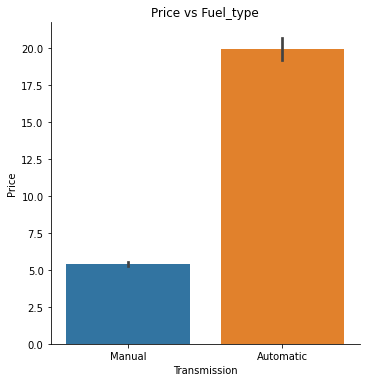

In [27]:
sns.catplot(x ='Transmission' , y = 'Price',kind = 'bar',data = df)
plt.title("Price vs Fuel_type")


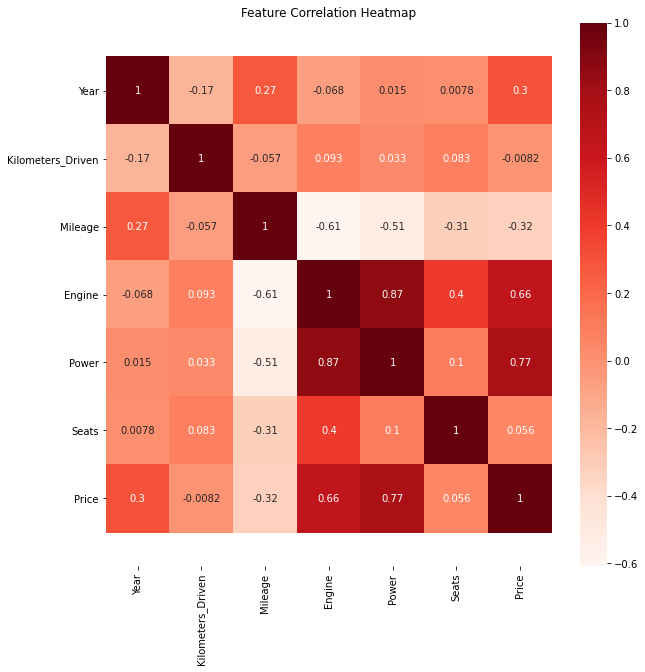

In [28]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Reds')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

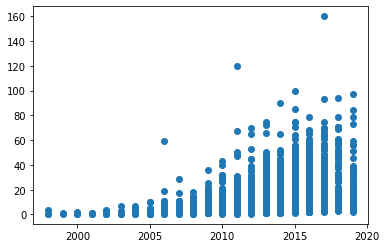

In [29]:
plt.scatter(y = 'Price', x = 'Year',data = df)

In [30]:
#Creating a new feature for total number of years old
df['Present_Year'] = 2021
df['No_Years_Old'] = df['Present_Year'] - df['Year']

In [31]:
#One hot encoding for fuel_type feature
Fuel_new= df[['Fuel_Type']]
Fuel_new= pd.get_dummies(Fuel_new,drop_first=True)
Fuel_new.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [32]:
#One hot encoding for Transmission
Transmission_new = df[['Transmission']]
Transmission_new = pd.get_dummies(Transmission_new,drop_first=True)
Transmission_new.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [33]:
#One hot encoding for Location
Location_new = df[['Location']]
Location_new = pd.get_dummies(Location_new,drop_first=True)
Location_new.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [34]:
#Dropping unnecessary features 
df= df.drop(['Year','Present_Year','Name'],axis = 1)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
#Label encoding for Owner_type
df['Owner_Type'] = le.fit_transform(df['Owner_Type'])

In [37]:
#Concatinating all the  new built features into a new data frame
new_df=pd.concat([df,Location_new,Fuel_new,Transmission_new],axis=1)
new_df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,72000,CNG,Manual,0,37.24,998.0,58.16,5.0,1.75,...,0,0,0,0,1,0,0,0,0,1
1,Pune,41000,Diesel,Manual,0,19.60,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,46000,Petrol,Manual,0,18.00,1199.0,88.70,5.0,4.50,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,87000,Diesel,Manual,0,20.70,1248.0,88.76,7.0,6.00,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,40670,Diesel,Automatic,2,15.00,1968.0,140.80,5.0,17.74,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#Dropping unnecessary features from the new data frame
new_df.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
new_df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,No_Years_Old,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,72000,0,37.24,998.0,58.16,5.0,1.75,11,0,0,...,0,0,0,0,1,0,0,0,0,1
1,41000,0,19.60,1582.0,126.20,5.0,12.50,6,0,0,...,0,0,0,0,0,1,1,0,0,1
2,46000,0,18.00,1199.0,88.70,5.0,4.50,10,0,1,...,0,0,0,0,0,0,0,0,1,1
3,87000,0,20.70,1248.0,88.76,7.0,6.00,9,0,1,...,0,0,0,0,0,0,1,0,0,1
4,40670,2,15.00,1968.0,140.80,5.0,17.74,8,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
new_df.describe()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,No_Years_Old,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
count,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,...,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,5.831700e+04,0.367847,18.134156,1625.745572,113.276894,5.283719,9.603919,7.522309,0.059094,0.081063,...,0.122275,0.068460,0.109843,0.088726,0.131982,0.101158,0.536785,0.001703,0.452146,0.710150
std,9.216941e+04,0.806785,4.695584,601.641783,53.881892,0.805081,11.249453,3.164568,0.235821,0.272955,...,0.327631,0.252556,0.312721,0.284372,0.338500,0.301564,0.498688,0.041236,0.497747,0.453731
min,1.710000e+02,0.000000,0.000000,624.000000,34.200000,2.000000,0.440000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.342250e+04,0.000000,15.000000,1198.000000,75.000000,5.000000,3.517500,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.260900e+04,0.000000,18.000000,1495.500000,97.700000,5.000000,5.750000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,7.240275e+04,0.000000,21.000000,1991.000000,138.100000,5.000000,10.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,6.500000e+06,3.000000,46.956000,5998.000000,560.000000,10.000000,160.000000,23.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#New data frame has 22 features
new_df.shape

(5872, 22)

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    5872 non-null   int64  
 1   Owner_Type           5872 non-null   int32  
 2   Mileage              5872 non-null   float64
 3   Engine               5872 non-null   float64
 4   Power                5872 non-null   float64
 5   Seats                5872 non-null   float64
 6   Price                5872 non-null   float64
 7   No_Years_Old         5872 non-null   int64  
 8   Location_Bangalore   5872 non-null   uint8  
 9   Location_Chennai     5872 non-null   uint8  
 10  Location_Coimbatore  5872 non-null   uint8  
 11  Location_Delhi       5872 non-null   uint8  
 12  Location_Hyderabad   5872 non-null   uint8  
 13  Location_Jaipur      5872 non-null   uint8  
 14  Location_Kochi       5872 non-null   uint8  
 15  Location_Kolkata     5872 non-null   u

### Preprocessing of the Data

In [42]:
#Splitting of unlabaeled and unlabeled data
X = new_df.loc[:,['Kilometers_Driven', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual','No_Years_Old']]
X.shape

(5872, 21)

In [43]:
y = new_df.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [44]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model Building

In [46]:
#Importing models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_lr = lr.predict(X_test)

In [48]:
#Score on Linear regression
lr.score(X_test,y_test)

0.6566021173204766

In [49]:
from sklearn.linear_model import  Lasso, Ridge

In [50]:
#Model built with Linear regressionwith lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [51]:
#Score on Linear regression with lasso(L1 regularization)
lasso.score(X_test,y_test)

0.6385055902385925

In [52]:
y_pred_lasso= lasso.predict(X_test)

In [53]:
#Model built with Linear regression with Ridge regression
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [54]:
#Score on Linear regression with ridge(L2 regularization)
ridge.score(X_test,y_test)

0.6566094925474819

In [55]:
y_pred_ridge=ridge.predict(X_test)

In [56]:
#Model built with DecisionTrees 
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred_dtr=ridge.predict(X_test)

In [58]:
#Score on DecisionTrees
dtr.score(X_test,y_test)

0.7351621893734255

In [59]:
#Model built with Random Forest regressor 
from sklearn.ensemble import RandomForestRegressor

rfr =RandomForestRegressor()

rfr = RandomForestRegressor(n_estimators=200)

rfr.fit(X_train, y_train.values.ravel())

y_pred_rfr = rfr.predict(X_test)

In [60]:
#Score on Random Forest Regressor
rfr.score(X_test,y_test)

0.7967283105569108

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
#Model built by K Neightbours Regressor
knnModel = KNeighborsRegressor(n_neighbors=8)
knnModel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [63]:
knnModel.score(X_test,y_test)

0.5256256057389561

In [64]:
y_pred_knn=knnModel.predict(X_test)

In [65]:
#Finally,comparing different results obtained on the algorithms considered

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("""For LinearRegression,  RMSE is {:.2f} \t MSE is {:.2f} \t MAE is{:.2f} \t R2 is {:.2f} \t """.format(
            np.sqrt(mean_squared_error(y_test, y_pred_knn)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

print("""DecisionTreeRegressor, RMSE is {:.2f} \t MSE is {:.2f} \t MAE is{:.2f} \t R2 is {:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

print("""RandomForestRegressor, RMSE is {:.2f} \t MSE is {:.2f} \t MAE is{:.2f} \t R2 is {:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))


For LinearRegression,  RMSE is 8.50 	 MSE is 52.24 	 MAE is3.91 	 R2 is 0.66 	 
DecisionTreeRegressor, RMSE is 7.42 	 MSE is 52.24 	 MAE is3.91 	 R2 is 0.66
RandomForestRegressor, RMSE is 7.23 	 MSE is 30.93 	 MAE is1.76 	 R2 is 0.80


### Conclusion

Random Forest Regressor is the best choice for this data set using the above algorithms.

### References

 https://www.kaggle.com/avikasliwal/used-cars-price-prediction